<a href="https://colab.research.google.com/github/Prasannnnn/Machine-Learning-Projects/blob/main/Flower_Recognition_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import keras
import os

In [5]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/flowers'

img_size = 224
batch = 64


In [12]:
# Create a data augmentor
train_datagen = ImageDataGenerator(rescale=1. /255, shear_range=0.2,
                                   zoom_range=0.2, horizontal_flip = True,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1. /255, validation_split=0.2)

#create datasets
train_datagen = train_datagen.flow_from_directory(base_dir,
                                                  target_size=(img_size,img_size),
                                                  subset='training',batch_size=batch)

test_datagen = test_datagen.flow_from_directory(base_dir,
                                                target_size=(img_size, img_size),
                                                subset='validation',
                                                batch_size=batch)


Found 3461 images belonging to 5 classes.
Found 862 images belonging to 5 classes.


In [29]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5),padding='same',
                 activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64,kernel_size=(3, 3),
                       padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2, 2)))

model.add(Conv2D(filters=64,kernel_size=(3, 3),
                 padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2, 2)))

model.add(Conv2D(filters=64,kernel_size=(3, 3),
                 padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5,activation="softmax"))

In [31]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 64)      4864      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 28, 28, 64)       

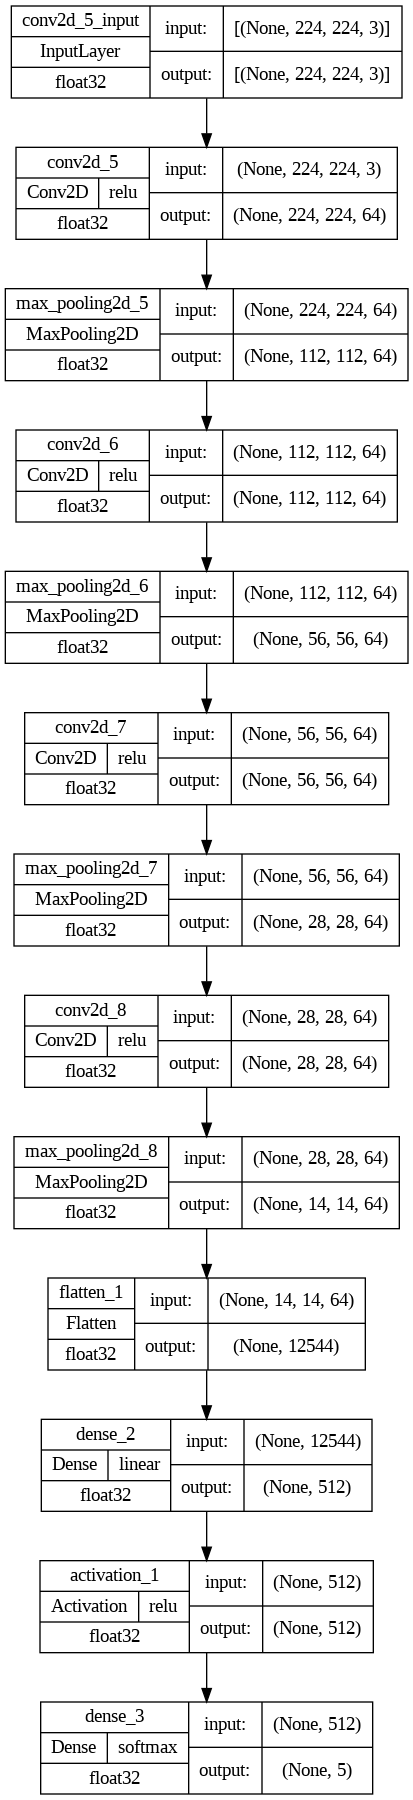

In [32]:
keras.utils.plot_model(
    model,
    show_shapes = True,
    show_dtype = True,
    show_layer_activations =True
)

In [33]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
epochs = 1
model.fit(train_datagen,epochs=epochs,validation_data =test_datagen)

55/55 [==============================] - 781s 14s/step - loss: 1.3084 - accuracy: 0.4273 - val_loss: 1.1087 - val_accuracy: 0.5151


In [35]:
from tensorflow.keras.models import load_model
model.save('Model.h5')

#load model
savedModel=load_model('Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
train_datagen.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

1/1 [==============================] - 0s 205ms/step
[[0.000000e+00 1.000000e+00 0.000000e+00 2.743903e-13 0.000000e+00]]
Dandelion


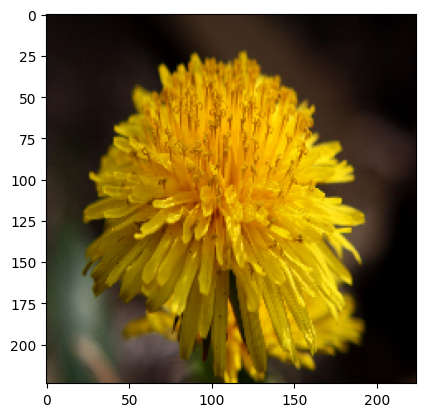

In [37]:
from keras.preprocessing import image

#Creating list for mapping

list_=['Daisy','Dandelion','Rose','Sunflower','tulip']

#input image
text_image = image.load_img('/content/dandelion-flower-close-up.jpg',target_size=(224,224))

#for show image

plt.imshow(text_image)
text_image=image.img_to_array(text_image)
text_image=np.expand_dims(text_image,axis=0)

#result array
result = savedModel.predict(text_image)
print(result)

i = 0
for i in range(len(result[0])):
  if (result[0][i]==1):
    print(list_[i])
    break


1/1 [==============================] - 0s 119ms/step
[[0. 0. 0. 0. 1.]]
tulip


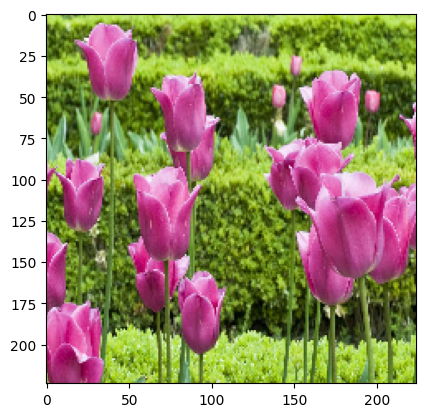

In [38]:
from keras.preprocessing import image

#Creating list for mapping

list_=['Daisy','Dandelion','Rose','Sunflower','tulip']

#input image
text_image = image.load_img('/content/tu.jpg',target_size=(224,224))

#for show image

plt.imshow(text_image)
text_image=image.img_to_array(text_image)
text_image=np.expand_dims(text_image,axis=0)

#result array
result = savedModel.predict(text_image)
print(result)

i = 0
for i in range(len(result[0])):
  if (result[0][i]==1):
    print(list_[i])
    break